# Chapter 1
## Papers on HL-LHC

Main papers of the week:
- https://e-publishing.cern.ch/index.php/CYRM/issue/view/40/11 (Vol. 4 (2017): High-Luminosity Large Hadron Collider (HL-LHC) Technical Design Report V. 0.1)
- https://inspirehep.net/files/b93e5f3309ad3d3de736b45986f5af7c (High Luminosity LHC Optics and Layout HLLHCV1.4)

### Vol. 4 (2017): High-Luminosity Large Hadron Collider (HL-LHC) Technical Design Report V. 0.1
The main objective of the High Luminosity LHC design study was to determine a set of beam parameters and the hardware configuration that will enable the LHC to reach the following targets: 
- a ***peak luminosity*** of 5$\times$10$^{34}cm^{−2}s^{−1}$;
- an ***integrated luminosity*** of 250 $fb^{−1}$ per year with the goal of 3000 $fb^{-1}$ in about a dozen years after the upgrade. This integrated luminosity is about ten times the expectedluminosity reach of the first twelve years of the LHC lifetime.

Luminosity definition: $\gamma$ $\times$ $\frac{n_{b}N^{2}f_{rev}}{4\pi\beta^{*}\epsilon_{n}}$R, R=$\frac{1}{\sqrt{1+\frac{\theta_{c}\sigma_{z}}{\sigma}}}$

Where **R** is a luminosity geometrical reduction factor from the crossing angle $\theta_{c}$. ($\sigma$ is the transverse one, $\sigma_{z}$ is the longitudinal one!)


<u>I still haven't investigated what is the **Hourglass effect** which is not included in this definition of Luminosity<u>



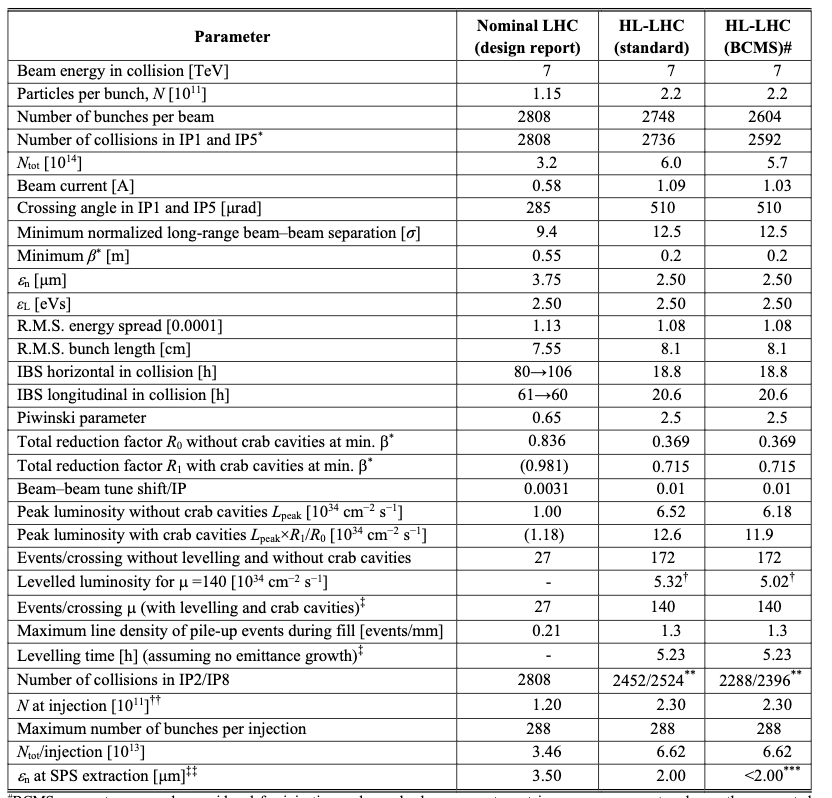







### High Luminosity LHC Optics and Layout HLLHCV1.4
#### Lattice design
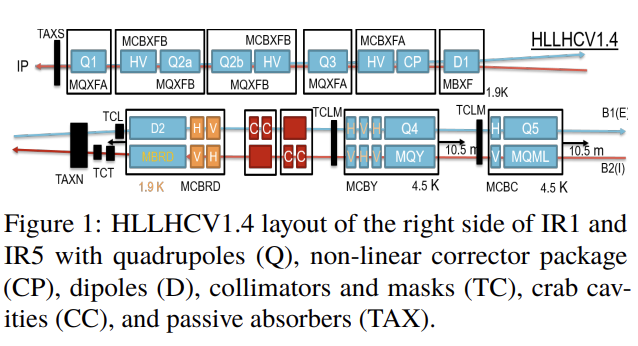



I reported in this figure the layout for IR1 and IR5


This design aims to reduce as much as possible the beam size at the 2 Interaction Points (IP).
The aperture of LHC IR magnets is 70 mm, in the HL-LHC design this becomes 150 mm for 2 reasons (https://iopscience.iop.org/article/10.1088/1361-6668/abdba4/pdf): 
- <u>increased aperture leads to increased $\beta$<u> (thus smaller $\beta^{*}$ in the IP)
- <u>more space to allocate shielding<u> (10 mm-thick tungsten beam screen)

I will now go through them to understand what they are and what they do (each magnet with X in the code is a single aperture magnet):
- **TAXS**:Target Absorbers Secondary, magnets are superconductive so they must be protected by radiation debris produced at IPs;
- **Q1 (MQXFA)**, **Q2a-Q2b(MQXFB)** and **Q3(MQXFA)** are the triplet, 11T magnets (switching from Nb–Ti to Nb$_{3}$Sn) with Q1 and Q3 focusing and Q2a and Q2b defocusing (triplet because + - + even though there are 4 magnets);
- **HV Orbit Correctors(MCBXFA/B)**: each of these magnets consists of two nested dipoles;
- **CP Non-linear corrector package**: provides compensation for non-linear errors in the IR (triplets, D1, D2);
- **Dipole 1 (MBXF)**: separes the beams after collision;
- **Dipole 2 (MBRD)**: recombination Dipole, direct the incoming beams toward the collision points, and restore parallel trajectories for the outgoing beams
- **Crab Cavities**: tilt the proton bunches in each beam, maximising their overlap at the collision point. Very close to IP so that $\beta(x)$ is big.
- **MCBY** and **MCBC**: closed orbit corrector dipoles placed in the vicinity of the interaction points
- **Q4** and **Q5** matching quadrupoles: <u>help me understand<u>: do they match the twiss functions before and after interaction?

### Optics configuration

LHC has various methods of operation, in this two plots the x and y of the two beams in Q3 right of IR5 are reported in two cases:
- Round Optics (left) :  $\beta^{*}$ is the same in both planes, i.e. $\frac{\beta^{*}_{x}}{\beta^{*}_{y}}=1$;
- Flat Optics (right) (https://inspirehep.net/files/a03444c9cd7fa1bf752c20f289263c83): $\frac{\beta^{*}_{x}}{\beta^{*}_{y}}\neq 1$; in this case the ratio is defined as $r^{*}$=$\frac{\beta^{*}_{X}}{\beta^{*}_{||}}$, where:
-$\beta^{*}_{X}$ is the $\beta^{*}$ in the crossing plane;
-$\beta^{*}_{||}$ is the $\beta^{*}$ in the parallel plane;

Next we define the geometric average of the two as $\beta^{*}_{eq}$=$\sqrt{\beta^{*}_{X}\times\beta^{*}_{||}}\sim$ctn (otherwise they could be as far as one desires).
Putting the two things in a system we obtain the change of variable:
\begin{cases}
       \beta^{*}_{X}= \sqrt{r^{*}}\times\beta^{*}_{eq}\\
       \beta^{*}_{||}= \frac{\beta^{*}_{eq}}{\sqrt{r^{*}}} \\
\end{cases}
As a result, when flattening a given optics at constant $\beta^{*}_{eq}$ i.e. acting only on the r$^{*}$ variable then what happens is that the $\beta^{*}$ is furtherly pushed in one of the two transverse planes.
At the LHC the plane chosen for the $\beta^{*}$ squeeze (i.e. the one with larger $\beta^{*}$) is the crossing plane, with an $r^{*}$=3-4.

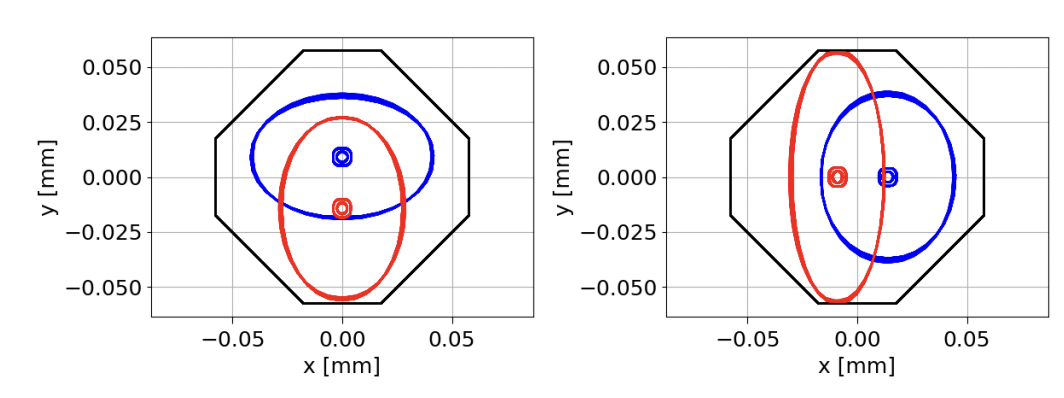

The optics parameters are shown in the next table.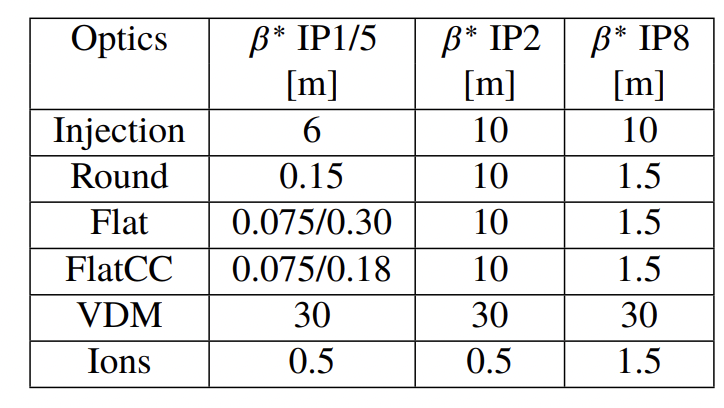

The $\beta^{*}$ in flat optics depends on the effective crossing angle, which is reduced with crab cavities (FlatCC)

# Chapter 2
## Thick run
First of all let's go through the commands of the config file for the simulations.
```bash
cd /afs/cern.ch/user/a/afornara/simulations/2022_02_07/thick
source miniconda/bin/activate
vi config.py
'mode'                      : 'b1_with_bb'
```
The parameter mode defines which beam needs to be configured for tracking, whether beam-beam effects should be included
```
'optics_file'              : 'optics_repository/HLLHCV1.4/round/opt_round_150_1500.madx',
```

```
'enable_imperfections'     : True
vi 000_pymask.py

```
First of all we want to address the strange peak behaviour of the precedent meeting. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
my_df = pd.read_parquet('../twiss_from_optics_seq_lhcb1.parquet')
my_df

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,aper_1,aper_2,aper_3,aper_4,apoff_1,apoff_2,aptol_1,aptol_2,aptol_3,apertype
,,,,,,,,,,,,,,,,,,,,,
ip3:1,ip3:1,marker,0.0000,121.576204,2.295892,0.000000,218.579505,-2.642867,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,circle
drift_0:0,drift_0:0,drift,20.1800,49.919796,1.254971,0.041702,340.121903,-3.380046,0.011790,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none
mcbwv.4r3.b1:1,mcbwv.4r3.b1:1,vkicker,21.8800,45.801966,1.167282,0.047362,351.719633,-3.442148,0.012572,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,circle
drift_1:0,drift_1:0,drift,22.5205,44.327838,1.134244,0.049624,356.144011,-3.465545,0.012860,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none
bpmw.4r3.b1:1,bpmw.4r3.b1:1,monitor,22.5205,44.327838,1.134244,0.049624,356.144011,-3.465545,0.012860,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,circle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bpmw.4l3.b1:1,bpmw.4l3.b1:1,monitor,26636.4387,250.621094,3.453619,62.289481,118.346112,-1.822966,60.297716,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,circle
drift_6626:0,drift_6626:0,drift,26639.3332,231.060253,3.304316,62.291395,129.205315,-1.928702,60.301442,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none
mcbwh.4l3.b1:1,mcbwh.4l3.b1:1,hkicker,26641.0332,219.974651,3.216626,62.292596,135.868476,-1.990804,60.303484,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,circle


In [4]:
my_df.loc[['ip1:1','ip5:1']][['s','s']]

,s,s
,,
ip1:1,19994.162400,19994.162400
ip5:1,6664.568433,6664.568433


In [5]:
my_df['betx'].min()

0.15001065451425458

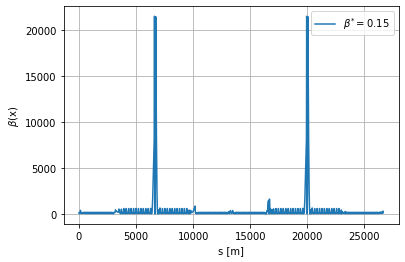

In [16]:
plt.plot(my_df['s'],my_df['betx'],label=r'$\beta^{*}=$0.15')
plt.legend()
plt.grid()
plt.xlabel('s [m]')
plt.gca().set_ylabel(r'$\beta$(x)');

So the problem seems corrected, the thin lenses approximation distorted the $\beta$ functions.

# Chapter 3
## Survey

A Survey is a representation of the geometry of the machine in the Laboratory reference frame.
First of all i will represent the survey for the Beam 1 and Beam 2.
Inside 000_pymask.py activate the survey with:

``` python
# Survey to plot the machine
for beam in ['b1','b2']:
        mad.input(f'use, sequence = lhc{beam}')
        mad.input('survey')
        mad.table.survey.dframe().to_parquet(f'survey_{beam}.parquet')
```      

Inside optics_specific_tools.py find the closed orbit with:

``` python
# Closed orbit
!Cycling w.r.t. to IP3 (mandatory to find closed orbit in collision in the presence of errors)
        if (mylhcbeam<3){'''
        f'''
          seqedit, sequence=lhcb1; flatten; cycle, start={starting_ip}; flatten; endedit;'''
        '''};'''
        f'''seqedit, sequence=lhcb2; flatten; cycle, start={starting_ip}; flatten; endedit;
        '''))
```

In [7]:
my_df_b1 = pd.read_parquet('../survey_b1.parquet')
#my_df_b1
#print(my_df2.loc[(my_df2['s'] > 19800.)&((my_df2['s'] < 20200.))])

In [8]:
my_df_b2 = pd.read_parquet('../survey_b2.parquet')
#my_df_b2

In [9]:
#my_df_b1['bpmw.4l3.b1':'lhcb1ip3_p_'] How to select a portion of a dataframe given two points on the accelerator

You will now see two "circles": these are not circles, are polygons, because LHC has straight and non straight sections, to be precise these are closed orbits. 
Conventions:
- Beam 1 goes in the clockwise direction;
- Physical Beam 2 goes counterclockwise but MADx Beam 2 goes clockwise.

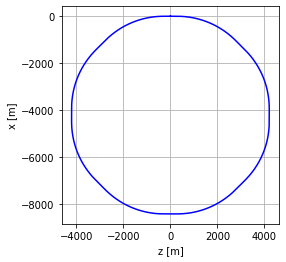

In [10]:
plt.plot(my_df_b1['z'],my_df_b1['x'],'blue')
plt.axis('square');
plt.grid()
plt.xlabel('z [m]')
plt.gca().set_ylabel('x [m]');

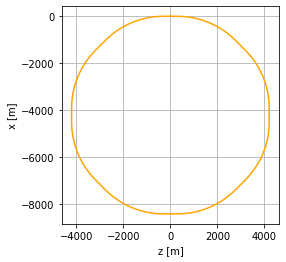

In [11]:
plt.plot(my_df_b2['z'],my_df_b2['x'],'orange')
plt.axis('square');
plt.grid()
plt.xlabel('z [m]')
plt.gca().set_ylabel('x [m]');

## Interaction Region IR1

Now let's focus on the IR1.
To do this i will slice the survey in the region of interest between the MQML left and right.
Notice that the direction is the same for b1 and b2, even though b2 represent the counterclockwise beam.

In [12]:
#my_df_b1['s']<100
#my_df_b1[my_df_b1['s']<100].copy()
#ip1_b1_df=my_df_b1[(my_df_b1['s']>20200.) & (my_df_b1['s']<20300.)]
#ip1_b2_df=my_df_b2[(my_df_b2['s']>19850.) & (my_df_b2['s']<20140.)]
#my_df2['mbrd.4l1.b1':'ip1']

I have tried several ways to select a certain region of the LHC and in this case i have found out that slicing using the exact magnet position works fine.

In [13]:
ip1_b1_df=my_df_b1['mqml.5l1.b1':'mqml.5r1.b1']
ip1_b2_df=my_df_b2['mqml.5l1.b2':'mqml.5r1.b2']

''

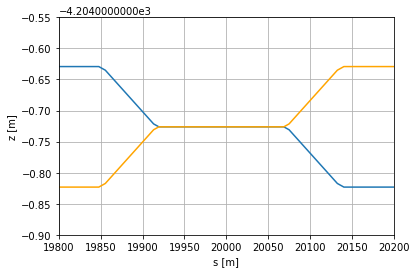

In [14]:
plt.plot(ip1_b1_df['s'],ip1_b1_df['z'])
plt.plot(ip1_b2_df['s'],ip1_b2_df['z'],'orange')
plt.grid()
plt.xlabel('s [m]')
plt.gca().set_ylabel('z [m]');
plt.xlim(19800,20200)
plt.ylim(-4204.9,-4204.55)
;

The interaction region is clearly visibile, with one beam going in one direction and the other one going against it. 
After the interaction the two beams take different paths, each going on its own trajectory, which is very close to the other (as visible from the plot) but different. This is important because if the two beams were on the same trajectory we would have many interactions in every section of the accelerator, and that would kill the vast majority of the bunches and reduce the luminosity significantly.

## Phase advance in the IR

Now we want to explore what happens to the $\mu_{x}$ in the IR.
We need to use the "Twiss" dataset (how to call it properly?), i.e. the one in the Beam reference frame.

(288.0, 294.0)

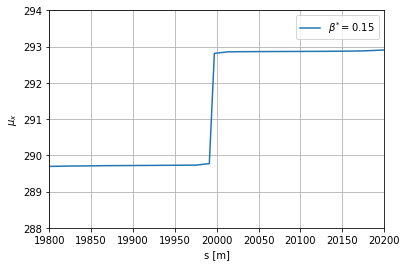

In [15]:
plt.plot(my_df['s'],my_df['mux']*2*np.pi,label=r'$\beta^{*}=$0.15')
plt.legend()
plt.grid()
plt.xlabel('s [m]')
plt.gca().set_ylabel(r'$\mu_{x}$');
plt.xlim(19800,20200)
plt.ylim(288,294)

What is the phase advance in the IR? We perform the $\mu_{x}$=$\frac{1}{2\pi}\int_{1}^{L}\frac{1}{\beta(s)}$ over the IR.

In [20]:
sliced_df=my_df[(my_df['s']>19800.) & (my_df['s']<20200.)]
np.trapz(1/sliced_df['betx'],sliced_df['s'])/2/np.pi
#np.trapz(my_df['mux'],my_df['s'])/2/np.pi

130843.55377195172

# Chapter 3
## b1 and b2 distance

First of all i shall open the data available for the b1 and b2 with crossing enabled.

In [3]:
df_b1 = pd.read_parquet('../twiss_with_crossing_seq_lhcb1.parquet')
df_b1
df_b2 = pd.read_parquet('../twiss_with_crossing_seq_lhcb2.parquet')
df_b2

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
,,,,,,,,,,,,,,,,,,,,,
ip3:1,ip3:1,marker,0.0000,120.886732,-2.278035,0.000000,217.879508,2.639116,0.000000,8.001411e-07,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0:0,drift_0:0,drift,17.8500,218.526147,-3.191961,0.017514,135.310819,1.986581,0.016576,1.136568e-06,...,2.293276e-18,2.371205e-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mcbwh.4r3.b2:1,mcbwh.4r3.b2:1,hkicker,19.5500,229.526782,-3.279001,0.018722,128.662093,1.924435,0.018626,1.168608e-06,...,2.511683e-18,2.844371e-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1:0,drift_1:0,drift,22.4445,248.937884,-3.427201,0.020650,117.827817,1.818621,0.022368,1.223162e-06,...,2.883554e-18,3.748975e-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bpmw.4r3.b2:1,bpmw.4r3.b2:1,monitor,22.4445,248.937884,-3.427201,0.020650,117.827817,1.818621,0.022368,1.223162e-06,...,2.883554e-18,3.748975e-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bpmw.4l3.b2:1,bpmw.4l3.b2:1,monitor,26636.3627,44.249201,-1.124977,62.260277,355.288451,3.462389,60.307034,3.756874e-07,...,6.591028e-13,3.783643e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_6628:0,drift_6628:0,drift,26637.0032,45.711301,-1.157771,62.262544,350.868128,3.438974,60.307323,3.877592e-07,...,6.591029e-13,3.783643e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mcbwv.4l3.b2:1,mcbwv.4l3.b2:1,vkicker,26638.7032,49.795692,-1.244812,62.268216,339.281264,3.376828,60.308107,4.197998e-07,...,6.591031e-13,3.783643e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


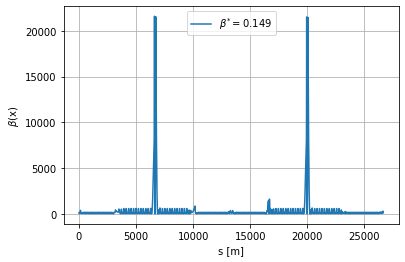

In [4]:
plt.plot(df_b1['s'],df_b1['betx'],label=r'$\beta^{*}=$0.149')
plt.legend()
plt.grid()
plt.xlabel('s [m]')
plt.gca().set_ylabel(r'$\beta$(x)');

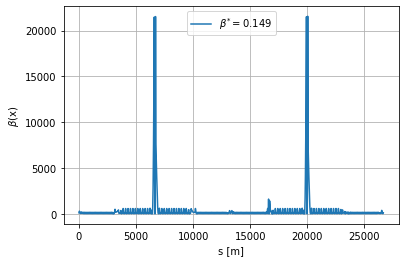

In [5]:
plt.plot(df_b2['s'],df_b2['betx'],label=r'$\beta^{*}=$0.149')
plt.legend()
plt.grid()
plt.xlabel('s [m]')
plt.gca().set_ylabel(r'$\beta$(x)');

First of all i plot, directly from the dataframes, the Beam 1 (blue), Beam 2 (red) and the vertical line representing IP5

''

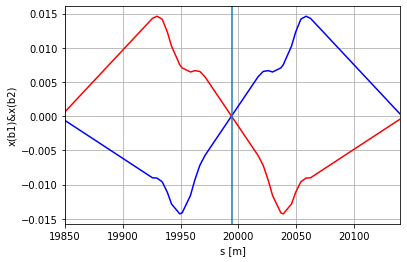

In [6]:
plt.plot(df_b1['s'],df_b1['x'],'blue')
plt.grid()
plt.xlabel('s [m]')
plt.gca().set_ylabel(r'x(b1)&x(b2)')
plt.xlim(19850,20140)
plt.plot(df_b2['s'],df_b2['x'],'red')
plt.axvline(x=19994.1624)
;

## Problem
If i want to calculate the difference between the two beams they need to be in the same reference which is NOT true (as we have seen in the survey). Furthermore the 2 dataframes have different labels, so it's impossible to evaluate the difference directly.
Rough solution: interpolation!

In [7]:
#First of all we make the s variable in the dataframe a numpy array
s1=df_b1['s'].to_numpy()
s2=df_b2['s'].to_numpy()
#Now we interpolate the x functions for the first and second beam
b1_x=np.interp(np.linspace(19850,20140),s1,df_b1['x'].to_numpy(),50000)
b2_x=np.interp(np.linspace(19850,20140),s2,df_b2['x'].to_numpy(),50000)
b1_betx=np.interp(np.linspace(19850,20140),s1,df_b1['betx'].to_numpy(),50000)

Now we plot the two interpolated functions.

''

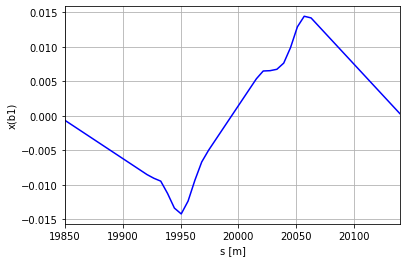

In [8]:
plt.plot(np.linspace(19850,20140),b1_x,'blue')
plt.grid()
plt.xlabel('s [m]')
plt.gca().set_ylabel(r'x(b1)')
plt.xlim(19850,20140)
;

''

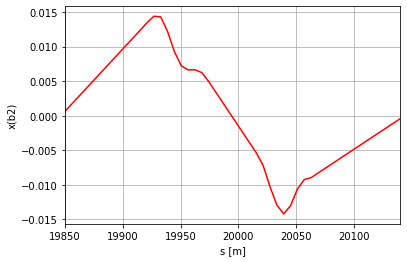

In [9]:
plt.plot(np.linspace(19850,20140),b2_x,'red')
plt.grid()
plt.xlabel('s [m]')
plt.gca().set_ylabel(r'x(b2)')
plt.xlim(19850,20140)
;

''

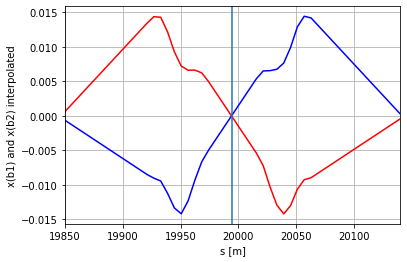

In [10]:
plt.plot(np.linspace(19850,20140),b1_x,'blue')
plt.grid()
plt.xlabel('s [m]')
plt.gca().set_ylabel(r'x(b1) and x(b2) interpolated')
plt.xlim(19850,20140)
plt.plot(np.linspace(19850,20140),b2_x,'red')
plt.axvline(x=19994.1624)
;

Now that we have 2 NumPy arrays we can calculate the difference.

''

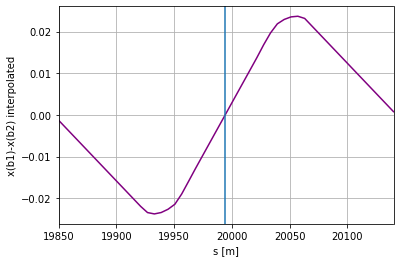

In [11]:
plt.plot(np.linspace(19850,20140),b1_x-b2_x,'purple')
plt.grid()
plt.xlabel('s [m]')
plt.gca().set_ylabel(r'x(b1)-x(b2) interpolated')
plt.xlim(19850,20140)
plt.axvline(x=19994.1624)
;

I'll try to define the distance in sigma between the two bunches.
First of all i will define $\sigma_{x}$=$\sqrt{\frac{\beta_{x}\epsilon}{\gamma}}$, with $\epsilon=3\times10^{-6}$

In [12]:
gamma=7000/.938
sigma_b1=np.sqrt(b1_betx*3e-6/gamma)
sigma_b1

array([0.0013069 , 0.00134451, 0.00138231, 0.00142053, 0.00146106,
       0.00150049, 0.00153891, 0.0015764 , 0.00161301, 0.00164881,
       0.00168483, 0.00172272, 0.00176045, 0.00179829, 0.00190762,
       0.0022938 , 0.0027444 , 0.00292171, 0.00255745, 0.00192896,
       0.00138417, 0.00102938, 0.00081906, 0.00056708, 0.00013074,
       0.00026679, 0.00064844, 0.00087736, 0.00111528, 0.00134807,
       0.00135772, 0.00139149, 0.00156951, 0.00202365, 0.00261734,
       0.00291077, 0.00285931, 0.00275243, 0.00264552, 0.00253857,
       0.00244487, 0.00234801, 0.00224698, 0.00214118, 0.00202988,
       0.0019121 , 0.00179036, 0.00168325, 0.0015772 , 0.00146988])

''

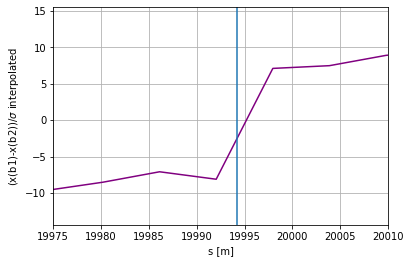

In [13]:
plt.plot(np.linspace(19850,20140),(b1_x-b2_x)/sigma_b1,'purple')
plt.grid()
plt.xlabel('s [m]')
plt.gca().set_ylabel(r'(x(b1)-x(b2))/$\sigma$ interpolated')
plt.xlim(19975,20010)
plt.axvline(x=19994.1624)
;

**What is happening?**

In [204]:
df_b1.loc[['ip1:1','ip5:1']][['x','y','s']]

,x,y,s
,,,
ip1:1,3.675441e-10,1.824620e-08,19994.162400
ip5:1,-2.096096e-08,4.085880e-09,6664.568433


In [205]:
df_b2.loc[['ip1:1','ip5:1']][['x','y','s']]

,x,y,s
,,,
ip1:1,-2.214615e-09,-2.355430e-08,19994.162400
ip5:1,2.631070e-08,6.944769e-09,6664.873167


In [206]:
df_b1.loc[['ip1:1']][['x']]

,x
,
ip1:1,3.675441e-10


In [3]:
df_b_minus1 = pd.read_parquet('/afs/cern.ch/user/a/afornara/simulations/2022_02_07/hl_lhc_collisions_python/final_twiss_BBOFF_-1.parquet')
df_b_minus1

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
,,,,,,,,,,,,,,,,,,,,,
ip3:1,ip3:1,marker,0.0000,118.414752,2.230475,0.000000,219.396818,-2.661981,0.000000,1.817711e-07,...,-5.061978e-09,0.005817,-4.169166e-08,-3.093544e-09,-1.389597e-10,5.121932e-10,1.107519e-11,-4.169166e-08,1.201409e-08,0.0
drift_0:0,drift_0:0,drift,21.0300,46.916945,1.169339,0.045523,347.659252,-3.437065,0.012131,-1.379432e-06,...,-5.061978e-09,0.005817,-4.169166e-08,-6.015837e-09,-1.389597e-10,7.451028e-10,1.107519e-11,-4.169166e-08,1.201409e-08,0.0
mcbwv.4r3.b1:1,mcbwv.4r3.b1:1,vkicker,21.0300,46.916945,1.169339,0.045523,347.659252,-3.437065,0.012131,-1.379432e-06,...,-5.061978e-09,0.005817,-4.169166e-08,-6.015837e-09,-1.389597e-10,7.451028e-10,1.107519e-11,-4.169166e-08,1.201409e-08,0.0
drift_1:0,drift_1:0,drift,22.5205,43.543256,1.094131,0.050772,357.986982,-3.491999,0.012803,-1.490082e-06,...,-5.061978e-09,0.005817,-4.169166e-08,-6.222954e-09,-1.389597e-10,7.616102e-10,1.107519e-11,-4.169166e-08,1.201409e-08,0.0
bpmw.4r3.b1:1,bpmw.4r3.b1:1,monitor,22.5205,43.543256,1.094131,0.050772,357.986982,-3.491999,0.012803,-1.490082e-06,...,-5.061978e-09,0.005817,-4.169166e-08,-6.222954e-09,-1.389597e-10,7.616102e-10,1.107519e-11,-4.169166e-08,1.201409e-08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bpmw.4l3.b1:1,bpmw.4l3.b1:1,monitor,26636.4387,243.952634,3.362912,62.288942,118.467975,-1.834594,60.297780,1.847982e-06,...,-5.061978e-09,0.005817,-4.169167e-08,2.530629e-11,-1.389597e-10,2.636179e-10,1.107519e-11,-4.169167e-08,1.201409e-08,0.0
drift_11964:0,drift_11964:0,drift,26640.1832,219.475354,3.173976,62.291518,132.723898,-1.972584,60.302533,1.570002e-06,...,-5.061978e-09,0.005817,-4.169167e-08,-4.950231e-10,-1.389597e-10,3.050886e-10,1.107519e-11,-4.169167e-08,1.201409e-08,0.0
mcbwh.4l3.b1:1,mcbwh.4l3.b1:1,hkicker,26640.1832,219.475354,3.173976,62.291518,132.723898,-1.972584,60.302533,1.570002e-06,...,-5.061978e-09,0.005817,-4.169167e-08,-4.950231e-10,-1.389597e-10,3.050886e-10,1.107519e-11,-4.169167e-08,1.201409e-08,0.0


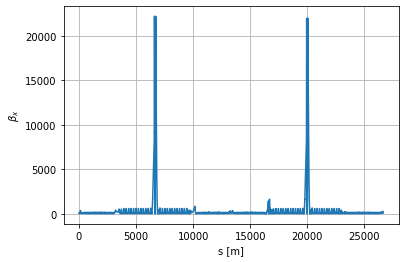

In [17]:
plt.plot(df_b_minus1['s'],df_b_minus1['betx'])
plt.grid()
plt.xlabel('s [m]')
plt.gca().set_ylabel(r'$\beta_{x}$');

In [4]:
df_b_minus2 = pd.read_parquet('/afs/cern.ch/user/a/afornara/simulations/2022_02_07/hl_lhc_collisions_python/final_twiss_BBOFF_-2.parquet')
df_b_minus2

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
,,,,,,,,,,,,,,,,,,,,,
ip3:1,ip3:1,marker,0.0000,119.274200,2.254712,0.000000,218.793054,-2.669022,0.000000,1.947278e-07,...,-5.063880e-09,0.005817,-4.169211e-08,-3.072801e-09,-1.393400e-10,5.136081e-10,1.112238e-11,-4.169211e-08,1.201428e-08,0.0
drift_0:0,drift_0:0,drift,21.0300,46.999269,1.182055,0.045313,347.472452,-3.449852,0.012151,-1.370249e-06,...,-5.063880e-09,0.005817,-4.169211e-08,-6.003091e-09,-1.393400e-10,7.475101e-10,1.112238e-11,-4.169211e-08,1.201428e-08,0.0
mcbwv.4r3.b1:1,mcbwv.4r3.b1:1,vkicker,21.0300,46.999269,1.182055,0.045313,347.472452,-3.449852,0.012151,-1.370249e-06,...,-5.063880e-09,0.005817,-4.169211e-08,-6.003091e-09,-1.393400e-10,7.475101e-10,1.112238e-11,-4.169211e-08,1.201428e-08,0.0
drift_1:0,drift_1:0,drift,22.5205,43.588890,1.106031,0.050555,357.838905,-3.505193,0.012823,-1.481167e-06,...,-5.063880e-09,0.005817,-4.169211e-08,-6.210775e-09,-1.393400e-10,7.640879e-10,1.112238e-11,-4.169211e-08,1.201428e-08,0.0
bpmw.4r3.b1:1,bpmw.4r3.b1:1,monitor,22.5205,43.588890,1.106031,0.050555,357.838905,-3.505193,0.012823,-1.481167e-06,...,-5.063880e-09,0.005817,-4.169211e-08,-6.210775e-09,-1.393400e-10,7.640879e-10,1.112238e-11,-4.169211e-08,1.201428e-08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bpmw.4l3.b1:1,bpmw.4l3.b1:1,monitor,26636.4387,246.175942,3.399443,62.289115,117.685477,-1.835497,60.297674,1.864966e-06,...,-5.063880e-09,0.005817,-4.169211e-08,5.458398e-11,-1.393400e-10,2.639736e-10,1.112238e-11,-4.169211e-08,1.201428e-08,0.0
drift_11964:0,drift_11964:0,drift,26640.1832,221.432761,3.208456,62.291667,131.951990,-1.974510,60.302457,1.586314e-06,...,-5.063880e-09,0.005817,-4.169211e-08,-4.671693e-10,-1.393400e-10,3.056211e-10,1.112238e-11,-4.169211e-08,1.201428e-08,0.0
mcbwh.4l3.b1:1,mcbwh.4l3.b1:1,hkicker,26640.1832,221.432761,3.208456,62.291667,131.951990,-1.974510,60.302457,1.586314e-06,...,-5.063880e-09,0.005817,-4.169211e-08,-4.671693e-10,-1.393400e-10,3.056211e-10,1.112238e-11,-4.169211e-08,1.201428e-08,0.0


In [5]:
df_b_minus3 = pd.read_parquet('/afs/cern.ch/user/a/afornara/simulations/2022_02_07/hl_lhc_collisions_python/final_twiss_BBOFF_-3.parquet')
df_b_minus3

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
,,,,,,,,,,,,,,,,,,,,,
ip3:1,ip3:1,marker,0.0000,120.154005,2.279249,0.000000,218.279209,-2.677142,0.000000,2.077126e-07,...,-5.066630e-09,0.005817,-4.169255e-08,-3.052192e-09,-1.397163e-10,5.152207e-10,1.117126e-11,-4.169255e-08,1.201447e-08,0.0
drift_0:0,drift_0:0,drift,21.0300,47.091359,1.194975,0.045097,347.426770,-3.463993,0.012166,-1.361032e-06,...,-5.066630e-09,0.005817,-4.169255e-08,-5.990396e-09,-1.397163e-10,7.501505e-10,1.117126e-11,-4.169255e-08,1.201447e-08,0.0
mcbwv.4r3.b1:1,mcbwv.4r3.b1:1,vkicker,21.0300,47.091359,1.194975,0.045097,347.426770,-3.463993,0.012166,-1.361032e-06,...,-5.066630e-09,0.005817,-4.169255e-08,-5.990396e-09,-1.397163e-10,7.501505e-10,1.117126e-11,-4.169255e-08,1.201447e-08,0.0
drift_1:0,drift_1:0,drift,22.5205,43.643694,1.118127,0.050330,357.836015,-3.519761,0.012839,-1.472217e-06,...,-5.066630e-09,0.005817,-4.169255e-08,-6.198641e-09,-1.397163e-10,7.668011e-10,1.117126e-11,-4.169255e-08,1.201447e-08,0.0
bpmw.4r3.b1:1,bpmw.4r3.b1:1,monitor,22.5205,43.643694,1.118127,0.050330,357.836015,-3.519761,0.012839,-1.472217e-06,...,-5.066630e-09,0.005817,-4.169255e-08,-6.198641e-09,-1.397163e-10,7.668011e-10,1.117126e-11,-4.169255e-08,1.201447e-08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bpmw.4l3.b1:1,bpmw.4l3.b1:1,monitor,26636.4387,248.435416,3.436378,62.289287,116.951013,-1.837187,60.297577,1.881973e-06,...,-5.066630e-09,0.005817,-4.169256e-08,8.363791e-11,-1.397163e-10,2.644892e-10,1.117126e-11,-4.169256e-08,1.201447e-08,0.0
drift_11964:0,drift_11964:0,drift,26640.1832,223.423375,3.243322,62.291817,131.234200,-1.977272,60.302389,1.602650e-06,...,-5.066630e-09,0.005817,-4.169256e-08,-4.395244e-10,-1.397163e-10,3.063196e-10,1.117126e-11,-4.169256e-08,1.201447e-08,0.0
mcbwh.4l3.b1:1,mcbwh.4l3.b1:1,hkicker,26640.1832,223.423375,3.243322,62.291817,131.234200,-1.977272,60.302389,1.602650e-06,...,-5.066630e-09,0.005817,-4.169256e-08,-4.395244e-10,-1.397163e-10,3.063196e-10,1.117126e-11,-4.169256e-08,1.201447e-08,0.0
